# Installing and importing all required packages

In [6]:
!pip install Pillow
!pip install opencv-python
!pip install opencv-contrib-python

In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ASSIGNMENT

### Code get images of Koen

In [2]:
#two boys from video footage

import cv2


path = "Images4/"
count = 0
framelist = []

cam = cv2.VideoCapture('twoboys.MOV') # running personal video of my sons through
face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

while True:
    ret,img = cam.read() #ret is a boolean, can use any other name, it will be true if can capture video, img is the array of the captured image
    faces = face_cascade.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
        face = img[y:y+h,x:x+w]
    cv2.imshow("twoboys",img) #img is changing continuously, plt can't be used because it doesn't work for videos
    cv2.imwrite(path+str(count)+'.jpg', face) #save the face detected
    count+=1
    framelist.append(face)
    if cv2.waitKey(1) == 32 or ret == False: #spacebar is pressed
        break
cam.release()
cv2.destroyAllWindows()

print(framelist)

[array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [144, 134, 147],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]

In [3]:
print(framelist[0])

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [144 134 147]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


### Code to get images of Mummy

In [2]:
#the mummy from vid cam input
import cv2


path = "Images5/"
count = 0
framelist = []

cam = cv2.VideoCapture(0) # capture mummy face from video cam
face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

while True:
    ret,img = cam.read() #ret is a boolean, can use any other name, it will be true if can capture video, img is the array of the captured image
    faces = face_cascade.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
        face = img[y:y+h,x:x+w]
    cv2.imshow("mummy",img) #img is changing continuously, plt can't be used because it doesn't work for videos
    cv2.imwrite(path+str(count)+'.jpg', face) #save the face detected
    count+=1
    framelist.append(face)
    if cv2.waitKey(1) == 32:
        break
cam.release()
cv2.destroyAllWindows()



### Amending above Code to get data for training model

#### Difference between above code and codes below is that the above code shows the bounding box on the full video and live camera feed but it does also extract faces and save them in the file.  The codes below resize the images to 200 x 200 and makes them grayscale.

In [2]:
#Import the relevant packages
import cv2
import numpy as np

#set count to 0. This is because we want to collect 50 images and we need this to set the counter to stop when 50 images
#are collected
count = 0 
#I included a framelist as a list which will fill up with my 50 images (recorded as arrays) collected.
framelist = []

cam = cv2.VideoCapture(0) # capture mummy face from video cam. The video cam is the primary camera so this is set to 0
face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml') #using the Haarscascade classifier
#and storing it as a variable called face_cascade

#create a loop to keep capturing images until number of images hit 50
while True:
    ret,img = cam.read() #ret is a boolean, can use any other name, it will be true if can capture video, 
    #img is the array of the captured image
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #this converts the image captured to grayscale
    faces = face_cascade.detectMultiScale(img,1.3,5) #this uses the face_cascade variable earlier to detect faces. It is set
    #parameters 1.3 (percentage sensitivity) and 5 (number of neighbours)
    for(x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]  ## this is the roi. x,y refer to the coordinates, w,h refer to width and height
        face = cv2.resize(cropped_face,(200,200)) #this is to resize the image captured to 200x200 pixels
        count+=1 #this means that everytime an image is captured, it moves the counter up by 1
        path = "data/0/" #This is the specific folder for the mummy
        cv2.imwrite(path+str(count)+'.jpg', face) #save the face detected in the path and folder specified
        cv2.putText(face, str(count), (50,50), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 2) #this puts a text in 50 by 50 pixel
        #showing the counter running everytime an image is captured
        cv2.imshow('Face Cropper',face) #this is to show the face captured in a window
        framelist.append(face) #this is to append the image array to framelist
    
    if cv2.waitKey(1) == 32 or count == 50: #32 refers to the spacebar. If spacebar is pressed or count reach 50, the capture
        #will end
        break

cam.release() #this will release the camera
cv2.destroyAllWindows() #this will close all windows related to the operation above



In [4]:
#Import the relevant packages
import cv2
import numpy as np

count = 0 
framelist = []


cam = cv2.VideoCapture('twoboys.MOV') # capture Koen's face from video input
face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

while True:
    ret,img = cam.read() 
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img,1.3,5)    
    for(x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]  ## roi
        face = cv2.resize(cropped_face,(200,200))
        count+=1
        path = "data/1/" #This is the specific folder for Koen
        cv2.imwrite(path+str(count)+'.jpg', face) 
        cv2.putText(face, str(count), (50,50), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 2)
        cv2.imshow('Face Cropper',face)
        framelist.append(face)
    
    if cv2.waitKey(1) == 32 or count == 50 or ret == False: #spacebar is pressed or count reach 50 or the video runs out
        break

cam.release()
cv2.destroyAllWindows()



## Training the Model

In [3]:
import cv2
import numpy as np
import os 

def labels_for_training_data(directory): #Creates a function called labels_for_training_data taking directory(data) as input
    faces=[] #empty list created called faces. This is to append the arrays of the faces captured
    faceID=[] #empty list created called faceID. This is to append the faceIDs(folders) assigned to the faces captured

    for path,subdirnames,filenames in os.walk(directory): #this is to run through all files in the directory including folders
        for filename in filenames: #this is saying for every filename gone through
            if filename.startswith("."): #check whether it is a system file. If it begins with ".", it is a system file
                print("Skipping system file")#Skipping files that startwith . aka skip system files
                continue #continue scanning files while skipping any system file

            id=os.path.basename(path) #fetching subdirectory names. In this case the os.path.basename(path)returns the folder
            #either 0 or 1 which was earlier set up
            img_path=os.path.join(path,filename)#fetching image path by concatenating path and filename
            print("img_path:",img_path) #print the img_path with every iteration through the loop
            print("id:",id) #print the id with every iteration through the loop
            test_img=cv2.imread(img_path)#loading each image one by one for training
            if test_img is None: #loop where if the test_img loaded is not empty
                print("Image not loaded properly") #if test_img loaded is empty, print "Image not loaded properly"
                continue #skip images not loaded properly and go on to the next one
            faces_rect,gray_img=faceDetection(test_img) #Calling faceDetection function to return faces detected in 
            #particular image and return it in grayscale (gray_img)
            #print(test_img): This was a commented out code earlier included to test if the test_img was coming out empty
            if len(faces_rect)!=1: #condition where number of faces detected is not equal to 1, if more than 1, skip
                continue #Since we are assuming only single person images are being fed to classifier
            (x,y,w,h)=faces_rect[0] #changing the faces_rect which was a 2d array into a 1d array
            roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from grayscale image
            faces.append(roi_gray) #add the faces detected to faces list
            faceID.append(int(id)) #add the faceids assigned to faceID list
            
    return faces,faceID

def train_classifier(faces,faceID): #this is the function which is used to train the dataset
    face_recognizer=cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(faces,np.array(faceID))
    return face_recognizer

def faceDetection(test_img): #this is the function which is used in the training function above
    gray_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)#convert color image to grayscale
    face_haar_cascade=cv2.CascadeClassifier(r"C:\Users\ellen\Lithan_Module_1\opencvex\Haarcascades\haarcascade_frontalface_default.xml")#Load haar classifier
    faces=face_haar_cascade.detectMultiScale(gray_img)#detectMultiScale returns rectangles
    return faces,gray_img

#Comment belows lines when running this program second time.Since it saves training.yml file in directory
faces,faceID=labels_for_training_data(r'C:\Users\ellen\Lithan_Module_1\opencvex\data')
#print (faceID): this was a code commented out to troubleshoot why the program was not detecting faces
face_recognizer=train_classifier(faces,faceID) #this calls the function train_classifier
face_recognizer.write('trainingData.yml') #this creates the output of the training in the form of a yml file

print("Model Trained Sucessfully")

img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\1.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\10.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\11.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\12.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\13.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\14.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\15.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\16.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\17.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\18.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\19.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\2.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\20.jpg
id: 0
img_path: C:\Users\ellen\Lithan_Module_1\opencvex\data\0\21.jpg
id: 0
img_path: C:\Users\ell

In [9]:
print(faces)


[array([[131, 138, 143, ...,  58,  58,  60],
       [131, 139, 145, ...,  62,  63,  63],
       [134, 142, 148, ...,  65,  67,  68],
       ...,
       [253, 253, 253, ..., 124, 126, 128],
       [253, 253, 253, ..., 126, 128, 129],
       [253, 253, 253, ..., 128, 129, 130]], dtype=uint8), array([[41, 41, 42, ..., 28, 27, 27],
       [42, 42, 46, ..., 28, 27, 26],
       [41, 45, 49, ..., 29, 27, 27],
       ...,
       [89, 90, 90, ..., 86, 84, 84],
       [89, 90, 91, ..., 86, 84, 84],
       [89, 90, 90, ..., 87, 85, 85]], dtype=uint8), array([[41, 41, 42, ..., 28, 27, 27],
       [42, 42, 46, ..., 28, 27, 26],
       [41, 45, 49, ..., 29, 27, 27],
       ...,
       [89, 90, 90, ..., 86, 84, 84],
       [89, 90, 91, ..., 86, 84, 84],
       [89, 90, 90, ..., 87, 85, 85]], dtype=uint8), array([[41, 40, 40, ..., 27, 27, 27],
       [41, 40, 40, ..., 28, 27, 27],
       [41, 39, 39, ..., 28, 28, 27],
       ...,
       [90, 91, 91, ..., 86, 86, 86],
       [89, 90, 90, ..., 84, 85, 8

In [7]:
print((x,y,w,h))

(234, 171, 228, 228)


[[ 12  12 177 177]]


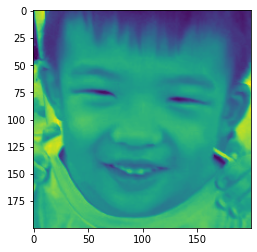

In [21]:
#This was a test to see if the faces were being detected.  
#Initially the training file was turning up empty because of parameters set for detecting faces.  
#Once that was removed, the faces could be captured
import matplotlib.pyplot as plt

test_img = cv2.imread(r'C:\Users\ellen\Lithan_Module_1\opencvex\data\1\2.jpg')
gray_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)#convert color image to grayscale
face_haar_cascade=cv2.CascadeClassifier(r"C:\Users\ellen\Lithan_Module_1\opencvex\Haarcascades\haarcascade_frontalface_default.xml")#Load haar classifier
faces=face_haar_cascade.detectMultiScale(gray_img)#detectMultiScale returns rectangles
print(faces)
plt.imshow(gray_img)


## Using video Cam for Recognition against Trained Dataset

In [11]:
import cv2
import numpy as np

#This module captures images via webcam and performs face recognition
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read('trainingData.yml')#Load saved training data

name = {0 : "Mummy",1 : "Koen"}

cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    
    gray_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)#convert color image to grayscale
    face_haar_cascade=cv2.CascadeClassifier(r"C:\Users\ellen\Lithan_Module_1\opencvex\Haarcascades\haarcascade_frontalface_default.xml")#Load haar classifier
    faces_detected=face_haar_cascade.detectMultiScale(gray_img,1.3,5)#detectMultiScale returns rectangles

    for face in faces_detected:
        (x,y,w,h)=face
        roi_gray=gray_img[y:y+w, x:x+h]
        label,confidence=face_recognizer.predict(roi_gray)#predicting the label of given image
        confidence = int(100-confidence)
        print("confidence:",confidence)
        print("label:",label)
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=3)
        predicted_name=name[label]
        if confidence > 45:
            cv2.putText(test_img,predicted_name,(x,y),cv2.FONT_HERSHEY_DUPLEX,2,(255,0,0),4)

    cv2.imshow('face recognition tutorial ',test_img)
    
    if cv2.waitKey(1) == 32:    #space key
        break

cap.release()
cv2.destroyAllWindows()

confidence: 58
label: 0
confidence: -5
label: 1
confidence: 58
label: 0
confidence: 60
label: 0
confidence: 50
label: 0
confidence: 47
label: 0
confidence: 48
label: 0
confidence: 51
label: 0
confidence: 49
label: 0
confidence: 47
label: 0
confidence: 47
label: 0
confidence: 49
label: 0
confidence: 63
label: 0
confidence: 52
label: 0
confidence: -24
label: 1
confidence: 56
label: 0
confidence: 46
label: 0
confidence: 60
label: 0
confidence: 59
label: 0
confidence: 63
label: 0
confidence: 53
label: 0
confidence: 58
label: 0
confidence: 55
label: 0
confidence: 59
label: 0
confidence: 60
label: 0
confidence: 57
label: 0
confidence: 49
label: 0
confidence: 63
label: 0
confidence: 39
label: 0
confidence: 40
label: 0
confidence: 39
label: 0
confidence: 49
label: 0
confidence: 61
label: 0
confidence: 50
label: 0
confidence: 59
label: 0
confidence: 53
label: 0
confidence: 52
label: 0
confidence: 46
label: 0
confidence: 48
label: 0
confidence: 52
label: 0
confidence: 54
label: 0
confidence: 55


In [10]:
import cv2
import numpy as np

#This module captures images via webcam and performs face recognition
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read('trainingData.yml')#Load saved training data

name = {0 : "Mummy",1 : "Koen"} #this assigns 2 possibilities for indentification. If detect 0 say Mummy. If detect 1 say Koen

cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    
    gray_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)#convert color image to grayscale
    face_haar_cascade=cv2.CascadeClassifier(r"C:\Users\ellen\Lithan_Module_1\opencvex\Haarcascades\haarcascade_frontalface_default.xml")#Load haar classifier
    faces_detected=face_haar_cascade.detectMultiScale(gray_img,1.3,5)#detectMultiScale returns rectangles

    for face in faces_detected:
        (x,y,w,h)=face
        roi_gray=gray_img[y:y+w, x:x+h] #this defines the roi based on the coordinates of x, y, and width(w), height(h)
        label,confidence=face_recognizer.predict(roi_gray)#predicting the label of given image
        confidence = int(100-confidence) #display the confidence as an integer ot 100 minus confidence measured
        print("confidence:",confidence)
        print("label:",label)
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=3) #draws a rectangle around the face captured
        predicted_name=name[label] 
        if confidence > 45: #only show prediction when confidence is more than 45
            cv2.putText(test_img,predicted_name,(x,y),cv2.FONT_HERSHEY_DUPLEX,2,(255,0,0),4) #display prediction in text

    cv2.imshow('face recognition tutorial ',test_img) #display window showing test run
    
    if cv2.waitKey(1) == 32:    #space key
        break

cap.release()
cv2.destroyAllWindows()

confidence: 51
label: 0
confidence: 52
label: 0
confidence: 52
label: 0
confidence: 52
label: 0
confidence: 49
label: 0
confidence: 46
label: 0
confidence: 46
label: 0
confidence: 51
label: 0
confidence: 43
label: 0
confidence: 43
label: 0
confidence: 51
label: 0
confidence: 49
label: 0
confidence: 51
label: 0
confidence: 53
label: 0
confidence: 63
label: 0
confidence: 57
label: 0
confidence: 64
label: 0
confidence: 65
label: 0
confidence: 63
label: 0
confidence: 63
label: 0
confidence: 61
label: 0
confidence: 61
label: 0


## Detecting Faces from Still Image

### Below are codes trying to detect faces from still image and saving them to a list and then showing the images in Jupyter and finally converting them into a function

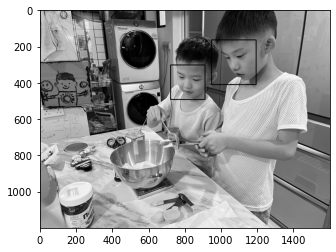

[[720 302 190 190]
 [946 164 246 246]]


In [3]:
#Trying a still image for face detection  
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('twoboys.jpeg',0)
face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img, 1.1, 5) 
#scalefactor and min NEighbours are for tuning, 1.1 is tuning by 10%
#min and max size is an estimation for how big the face is you are detecting
for x,y,w,h in faces:
    cv2.rectangle(img, (x,y),(x+w,y+h),(0,0,0),3) #draw a rectangle parameters:
    #image, pt 1, pt2, colour, thickness
plt.imshow(img, cmap = 'gray')

plt.show()
print(faces) #[[ x =   y =  w =  h = ]] is the bounding box

In [4]:
#Create function returns part of gray_img which is face along with its label/ID by creating an empty list as learnt in IU6
#and later appending images to it
facelist = []
count = 0
for x,y,w,h in faces:
    cv2.rectangle(img, (x,y),(x+w,y+h),(0,0,0),3) #draw a rectangle parameters:
    #image, pt 1, pt2, colour, thickness
    face = img[y:y+h,x:x+w] #y first because row first in array
    cv2.imwrite(str(count)+'.jpg', face) #save the image
    count+=1
    facelist.append(face)


print(facelist)
count

[array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 119,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 107,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)]


2

[[720 302 190 190]
 [946 164 246 246]]
[array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 119,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 107,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)]


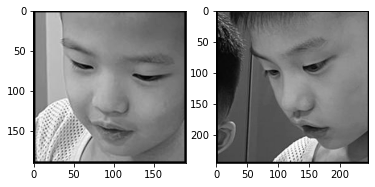

In [5]:
print(faces)
g = []
for i in range(len(faces)):
    x = img[faces[i][1]:faces[i][1]+faces[i][3],faces[i][0]:faces[i][0]+faces[i][2]]
    g.append(x)

print(g)

for i in range(len(g)):
    plt.subplot(1,2,i+1)
    plt.imshow(g[i], cmap = 'gray')
plt.show()

Key in image name with extension: twoboys.jpeg


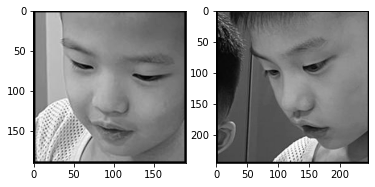

In [6]:
#make it into a function

#trying on another image for face detection.  Needed to change parameters
import cv2
import matplotlib.pyplot as plt

g = []

def isitface():

    img = cv2.imread(input("Key in image name with extension: "),0)
    face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img, 1.1, 5) 
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y),(x+w,y+h),(0,0,0),3) #draw a rectangle parameters:
    #image, pt 1, pt2, colour, thickness
    
    for i in range(len(faces)):
        x = img[faces[i][1]:faces[i][1]+faces[i][3],faces[i][0]:faces[i][0]+faces[i][2]]
        g.append(x)

    for i in range(len(g)):
        plt.subplot(1,2,i+1)
        plt.imshow(g[i], cmap = 'gray')
    plt.show()

isitface()

## Extracting only images from video and saving them

In [5]:
#Convert Video to Image and save in folder
import cv2


path = "Images2/"
count = 0
framelist = []

cam = cv2.VideoCapture(0) #0 represents webcam unless you get a video file, try other numbers if 1 doesn't work
#it won't work if the cam is on in other applications
while True:
    ret,img = cam.read() #ret is a boolean, can use any other name, it will be true if can capture video, 
    #img is the array of the captured image
    cv2.imshow("Webcam",img) #img is changing continuously, plt can't be used because it doesn't work for videos
    cv2.imwrite(path+str(count)+'.jpg', img) #save the image
    count+=1
    framelist.append(img)
    if cv2.waitKey(1) == 32 or count == 50: #spacebar is pressed or count hit 50
        break
cam.release()
cv2.destroyAllWindows()


In [6]:
print(framelist)

[array([[[ 82,  85,  86],
        [ 83,  86,  87],
        [ 85,  88,  89],
        ...,
        [118, 126, 126],
        [118, 126, 126],
        [118, 126, 126]],

       [[ 83,  87,  88],
        [ 83,  87,  88],
        [ 85,  89,  90],
        ...,
        [117, 126, 126],
        [117, 126, 126],
        [117, 126, 126]],

       [[ 85,  89,  90],
        [ 85,  89,  90],
        [ 86,  90,  91],
        ...,
        [115, 126, 126],
        [115, 126, 126],
        [115, 126, 126]],

       ...,

       [[105, 127, 135],
        [105, 127, 135],
        [105, 127, 135],
        ...,
        [113, 137, 140],
        [112, 136, 139],
        [111, 135, 138]],

       [[103, 126, 134],
        [103, 126, 134],
        [102, 126, 134],
        ...,
        [114, 138, 138],
        [113, 137, 137],
        [112, 136, 136]],

       [[103, 126, 134],
        [102, 126, 134],
        [101, 127, 134],
        ...,
        [114, 138, 137],
        [113, 137, 136],
        [112, 136, 135]

In [7]:
#Convert Video input to Image and save in folder
import cv2


path = "Images3/"
count = 0
framelist = []

cam = cv2.VideoCapture('twoboys.MOV') #using video input

while True:
    ret,img = cam.read() #ret is a boolean, can use any other name, it will be true if can capture video, 
    #img is the array of the captured image
    cv2.imshow("Boys",img) #img is changing continuously, plt can't be used because it doesn't work for videos
    cv2.imwrite(path+str(count)+'.jpg', img) #save the image
    count+=1
    framelist.append(img)
    if cv2.waitKey(1) == 32 or count == 50: #spacebar is pressed or count hit 50
        break
cam.release()
cv2.destroyAllWindows()


In [8]:
print(framelist)

[array([[[126, 153, 194],
        [127, 154, 195],
        [129, 156, 197],
        ...,
        [ 36,  43,  56],
        [ 37,  44,  55],
        [ 36,  43,  54]],

       [[126, 153, 194],
        [127, 154, 195],
        [129, 156, 197],
        ...,
        [ 34,  41,  54],
        [ 34,  41,  52],
        [ 35,  42,  53]],

       [[126, 153, 194],
        [127, 154, 195],
        [129, 156, 197],
        ...,
        [ 35,  42,  55],
        [ 35,  45,  55],
        [ 37,  47,  57]],

       ...,

       [[172, 201, 229],
        [173, 202, 230],
        [173, 202, 230],
        ...,
        [155, 181, 205],
        [156, 182, 206],
        [157, 183, 207]],

       [[172, 201, 229],
        [173, 202, 230],
        [173, 202, 230],
        ...,
        [156, 182, 206],
        [155, 181, 205],
        [156, 182, 206]],

       [[172, 201, 229],
        [173, 202, 230],
        [173, 202, 230],
        ...,
        [156, 182, 206],
        [155, 181, 205],
        [156, 182, 206]